In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import streamlit as st
import joblib

In [2]:
data = pd.read_csv('melb_data.csv')
display(data.head())

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

None

In [4]:
display(data.describe())

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


# Exploratory Data Analysis (EDA)

In [5]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [6]:
data = data.drop(['BuildingArea', 'YearBuilt', 'CouncilArea'], axis=1)
data.dropna()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,-37.85908,144.89299,Western Metropolitan,6380.0


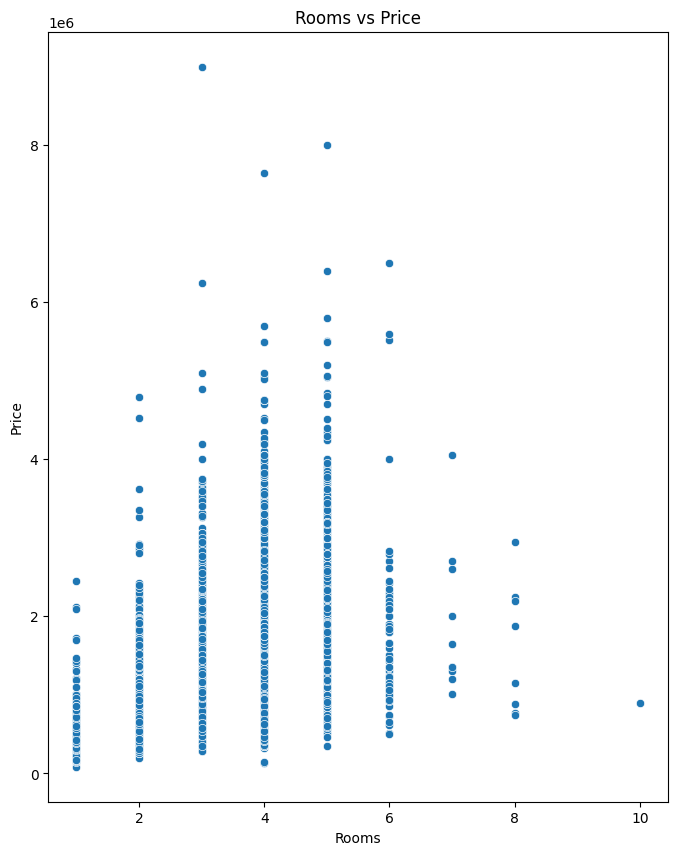

In [7]:
plt.figure(figsize=(8, 10))
sns.scatterplot(x=data['Rooms'], y=data['Price'])
plt.title('Rooms vs Price')
plt.show()

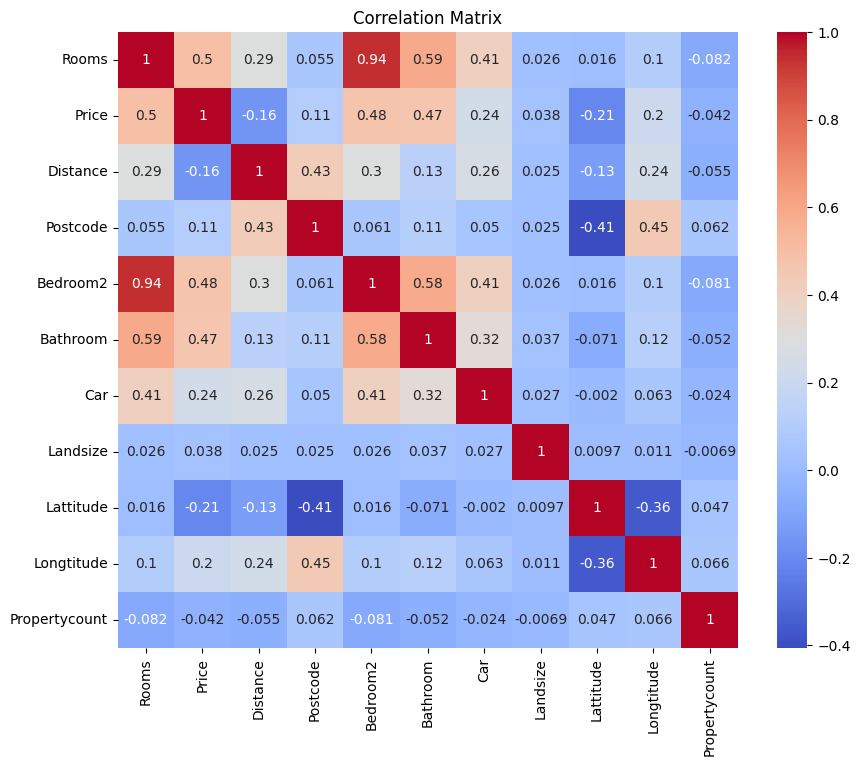

In [8]:
numerical_data = data.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Feature Selection and Preprocessing

In [9]:
selected_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude', 'Price']
data = data[selected_features]
display(data.head())

,Rooms,Bathroom,Landsize,Lattitude,Longtitude,Price
0,2,1.0,202.0,-37.7996,144.9984,1480000.0
1,2,1.0,156.0,-37.8079,144.9934,1035000.0
2,3,2.0,134.0,-37.8093,144.9944,1465000.0
3,3,2.0,94.0,-37.7969,144.9969,850000.0
4,4,1.0,120.0,-37.8072,144.9941,1600000.0


In [10]:
data.isna().sum()

Rooms         0
Bathroom      0
Landsize      0
Lattitude     0
Longtitude    0
Price         0
dtype: int64

In [11]:
X = data.drop('Price', axis=1)
y = data['Price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10864, 5) (2716, 5) (10864,) (2716,)


# Training and Evaluating Models

In [13]:
models = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(), 
    'Random Forest' : RandomForestRegressor(),
    'Gradient Boosting' : GradientBoostingRegressor()
}

In [14]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'R^2': r2}

In [15]:
for name, metrics in results.items():
    print(f"{name}:\n  MSE: {metrics['MSE']}\n  R^2: {metrics['R^2']}\n")

Linear Regression:
  MSE: 255509344951.54657
  R^2: 0.3567461397774673

Decision Tree:
  MSE: 176340024845.07895
  R^2: 0.5560577179091243

Random Forest:
  MSE: 80419904109.14882
  R^2: 0.797540032178683

Gradient Boosting:
  MSE: 112415029192.9727
  R^2: 0.7169911672345246



In [16]:
print("Model Performance")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Mean Squared Error (MSE): {metrics['MSE']:.2f}")
    print(f"  R^2 Score: {metrics['R^2']:.2f}")
    print()

best_model_mse = min(results, key=lambda x: results[x]['MSE'])
best_model_r2 = max(results, key=lambda x: results[x]['R^2'])

print(f"Best Model based on MSE: {best_model_mse} with MSE: {results[best_model_mse]['MSE']:.2f}")
print(f"Best Model based on R^2: {best_model_r2} with R^2 Score: {results[best_model_r2]['R^2']:.2f}")

Model Performance
Linear Regression:
  Mean Squared Error (MSE): 255509344951.55
  R^2 Score: 0.36

Decision Tree:
  Mean Squared Error (MSE): 176340024845.08
  R^2 Score: 0.56

Random Forest:
  Mean Squared Error (MSE): 80419904109.15
  R^2 Score: 0.80

Gradient Boosting:
  Mean Squared Error (MSE): 112415029192.97
  R^2 Score: 0.72

Best Model based on MSE: Random Forest with MSE: 80419904109.15
Best Model based on R^2: Random Forest with R^2 Score: 0.80


# Hyperparameter Tuning

a. Random Forest Hyperparameter Tuning

In [17]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth' : [10, 20 ,30],
    'min_samples_split' : [2, 5, 10]
}

grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', verbose=1)

grid_search_rf.fit(X_train, y_train)

print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best Score (Negative MSE) for Random Forest: {grid_search_rf.best_score_}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for Random Forest: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 200}
Best Score (Negative MSE) for Random Forest: -100426952360.65918


b. Gradient Boosting Hyperparameter Tuning

In [18]:
param_grid_gb = {
    'n_estimators': [100, 200], 
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

grid_search_gb = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error', verbose=1)

grid_search_gb.fit(X_train, y_train)

print(f'Best parameters for Gradient Boosting: {grid_search_gb.best_params_}')
print(f'Best Score (Negative MSE) for Gradient Boosting: {grid_search_gb.best_score_}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Best Score (Negative MSE) for Gradient Boosting: -103404614907.78214


Cross-Validation Score

In [19]:
best_rf = grid_search_rf.best_estimator_
cv_scores_rf = cross_val_score(best_rf, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation MSE for Best Random Forest: {-cv_scores_rf.mean()}')

best_gb = grid_search_gb.best_estimator_
cv_scores_gb = cross_val_score(best_gb, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation MSE for Gradient Boosting: {-cv_scores_gb.mean()}')

Cross-Validation MSE for Best Random Forest: 102224285587.84148
Cross-Validation MSE for Gradient Boosting: 103258733317.33545


# Test Set Evaluation

In [20]:
y_pred_rf = best_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Test set MSE for Best Random Forest: {mse_rf}')

y_pred_gb = best_gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f'Test Set MSE for Best Gradient Boosting: {mse_gb}')

if mse_rf < mse_gb:
    print("Random Forest performs better.")
else:
    print("Gradient Boosting performs better.")

Test set MSE for Best Random Forest: 79633534239.69086
Test Set MSE for Best Gradient Boosting: 80669883735.42549
Random Forest performs better.


# Feature Importances

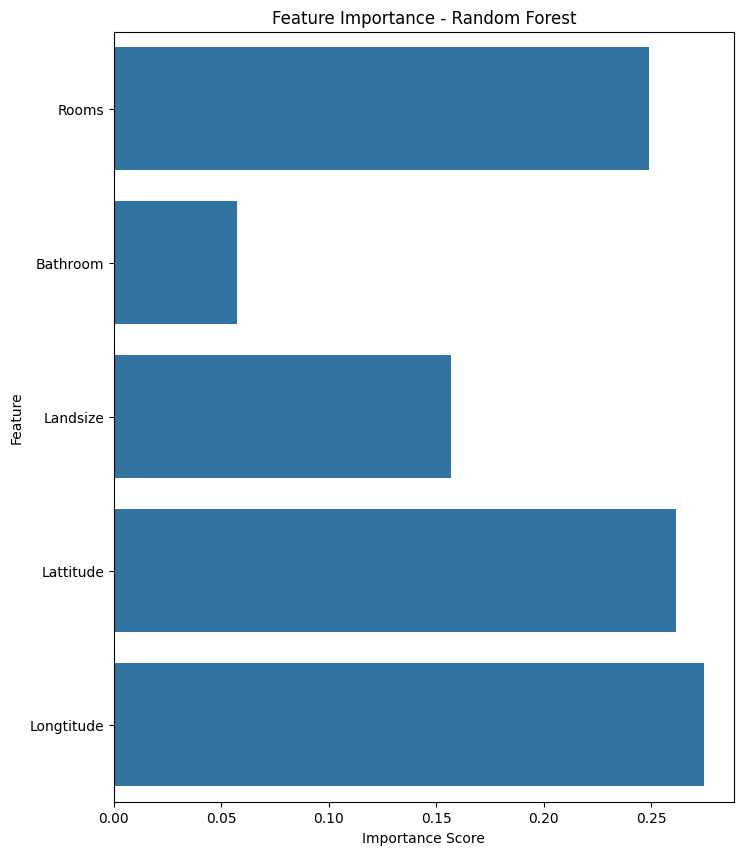

In [21]:
importances_rf = best_rf.feature_importances_
feature_names_rf = X_train.columns

plt.figure(figsize=(8, 10))
sns.barplot(x=importances_rf, y=feature_names_rf)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Residual Analysis

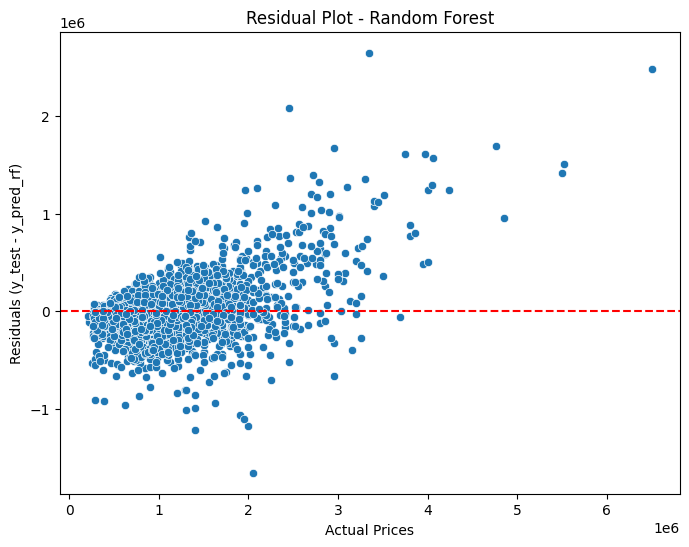

In [22]:
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals_rf)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot - Random Forest')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals (y_test - y_pred_rf)')
plt.show()


# Model Deployment

In [23]:
joblib.dump(best_rf, 'best_model_rf.pkl')

['best_model_rf.pkl']